In [2]:
import tensorflow as tf

In [3]:
import keras
from keras.models import Sequential
from keras import datasets

In [4]:
import numpy as np

In [5]:
fashion_mnist=keras.datasets.fashion_mnist

In [6]:
fashion_mnist

<module 'keras.datasets.fashion_mnist' from 'C:\\Users\\Rohan\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\datasets\\fashion_mnist.py'>

In [7]:
(X_train_pre,Y_train),(X_test_pre,Y_test)=fashion_mnist.load_data()

In [8]:
X_train_pre.shape

(60000, 28, 28)

In [9]:
#X_train_pre and X_test_pre are set with dimensions as (28,28)

In [10]:
from matplotlib import pyplot as plt

In [11]:
import cv2

In [12]:
model=Sequential()
resnet_layers=tf.keras.applications.ResNet50(
    include_top=False, #deletes the outer layer
    weights="imagenet",
    input_tensor=None,
    input_shape=(32,32,3), #according to X_train however check instructions on the page before use
    pooling='avg', #not required but preferred
    classes=10,#according to yoour need
  
)
for layer in resnet_layers.layers:
    layer.trainable=False

In [13]:
#minimum input size said to be 32x32

In [14]:
#input size (32,32,3)

In [15]:
from keras.layers import Flatten,Dense

In [16]:
model.add(resnet_layers)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax')) #10 classes in fashion_mnist

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________


In [19]:
#0: T-shirt/top
# 1: Trouser
# 2: Pullover
# 3: Dress
# 4: Coat
# 5: Sandal
# 6: Shirt
# 7: Sneaker
# 8: Bag
# 9: Ankle boot

In [20]:
X_train_pre.shape

(60000, 28, 28)

In [21]:
def pre_process(data):
    new_data = np.zeros((data.shape[0],32,32,3)) #data.shape[0] is number of samples
    
    for i in range(data.shape[0]):
        arr=np.array(data[i])
        arr=cv2.cvtColor(arr,cv2.COLOR_GRAY2RGB)
        arr=cv2.resize(arr, dsize=(32,32))
        arr=arr/255
        
        new_data[i,:,:,:]=arr
    
    return new_data

In [22]:
#"pre" datasets passed into pre_process to get final dataset, done with all the adjustments
#any future changes to entire dataset can be done on the function "pre_process" itself

In [23]:
X_train = pre_process(X_train_pre)
X_test = pre_process(X_test_pre)

In [24]:
X_train[0].shape

(32, 32, 3)

In [25]:
X_train.shape

(60000, 32, 32, 3)

(32, 32, 3)


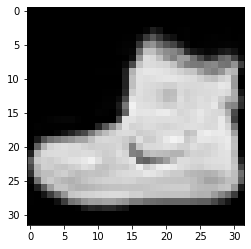

In [26]:
plt.imshow(np.array(X_train[0]))
print(X_train[0].shape)

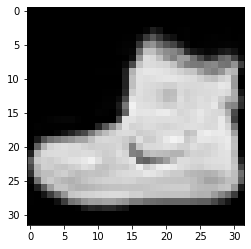

In [49]:
from random import shuffle
shuffle(X_train)

np.random.shuffle(X_train)
plt.imshow(X_train[0])

In [98]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.fit(
    X_train,
    Y_train,
    validation_split = 0.2,
    epochs=4)

Epoch 1/4


ValueError: in user code:

    File "C:\Users\Rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (50, 1) and (50, 10) are incompatible


In [80]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 32s 96ms/step - loss: 0.0000e+00 - accuracy: 0.1000


[0.0, 0.10000000149011612]

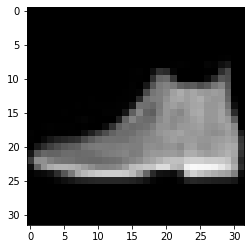

In [81]:
plt.imshow(X_test[0])

In [84]:
prediction=model.predict(
    X_test)

313/313 [==============================] - 26s 84ms/step


In [88]:
prediction[1]

array([1.], dtype=float32)

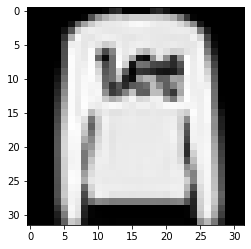

In [87]:
plt.imshow(X_test[1])